<a href="https://colab.research.google.com/github/MArcoAEAandrade/ic-inclusao-financeira/blob/main/02_cruzamentos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. Introdução e Contextualização

Análise de Inclusão Financeira: Jovens Periféricos negros
Projeto de Iniciação Científica (Marketing)

Objetivo: Este estudo investiga as barreiras à cidadania financeira enfrentadas por jovens de 15 a 29 anos, com foco no perfil racial (pretos e pardos) e em situações de vulnerabilidade (jovens que não estudam nem trabalham).



Metodologia: A análise cruza dados da PNADC (Pesquisa Nacional por Amostra de Domicílios Contínua) de 2024 com indicadores do Relatório de Cidadania Financeira do Banco Central e o Mapa de inadinplencia do SERASA. O objetivo é identificar como a ocupação e o contexto socioeconômico influenciam os índices de inadimplência e como o marketing pode apoiar em sanar estes danos colaterais

## Preparação de Dados para Cruzamento

In [48]:
### Importação das Bibliotecas
### Nesta etapa, são importadas as bibliotecas necessárias para manipulação, análise e visualização dos dados.

In [49]:
import pandas as pd

In [50]:
import numpy as np

In [51]:
import matplotlib.pyplot as plt

In [52]:
import seaborn as sns

In [53]:
###### Configuração de Visualização
### configuração abaixo permite a visualização de todas as colunas dos DataFrames, facilitando a inspeção e a limpeza dos dados.

In [54]:
pd.set_option('display.max_columns', None)


In [55]:
file_path_financeira = 'Anexo_Estatístico_do_Relatório_de_Cidadania_Financeira_2021.xlsx'

In [56]:
file_path_formulario_respostas = 'Formulario_respostas_IC.xlsx'

In [57]:
file_path_pnadc = 'PNADC-PesquisaNacionalporAmostradeDomicíliosContínua-SãoPaulo.csv'

In [58]:
###### Definição dos Caminhos dos Arquivos
###Aqui são definidos os caminhos dos arquivos utilizados na pesquisa, incluindo dados secundários (PNAD Contínua e Relatório de Cidadania Financeira) e dados primários coletados via formulário.


In [59]:
df_pnadc = pd.read_csv(file_path_pnadc, sep=';')

In [139]:
df_formulario = pd.read_excel(file_path_formulario_respostas)

In [61]:
###Nesta etapa, realizamos o carregamento das bases de dados utilizadas na pesquisa, contemplando tanto dados primários quanto dados secundários.
##Os dados primários correspondem às respostas coletadas por meio de formulário estruturado, armazenadas em formato Excel e importadas com o auxílio da biblioteca pandas.
##Já os dados secundários referem-se à base da PNAD Contínua, previamente salva em formato CSV e carregada respeitando o separador de colunas (`;`), padrão em bases estatísticas brasileiras.
##Após a leitura, ambas as bases são armazenadas em DataFrames, possibilitando as etapas subsequentes de exploração, limpeza, análise e cruzamento dos dados, de acordo com os objetivos do estudo.


### Cruzamento 1: Exclusão Estrutural (PNADC) e Vulnerabilidade Financeira (Relatório Financeiro)

In [62]:
# Filtrar dados de jovens (15-29 anos) ocupação de estudo e raça/cor (Preta ou Parda) no PNADC

In [63]:
df_jovens_ocupacao_estudo = df_pnadc[df_pnadc['Nível'].isin(['7.5.1.1', '7.5.1.2', '7.5.1.3', '7.5.1.4'])].copy()

In [64]:
df_jovens_ocupacao_estudo.rename(columns={'Indicador': 'Situação'}, inplace=True)

In [65]:
df_jovens_ocupacao_estudo = df_jovens_ocupacao_estudo [['Situação', '2024']][['Situação', '2024']]


#### Tabela de Situação de Ocupação e Estudo (Jovens 15-29 anos)

In [66]:
print(df_jovens_ocupacao_estudo.to_markdown(index=False))

| Situação                   |   2024 |
|:---------------------------|-------:|
| Não ocupada e estudando    |   22.2 |
| Ocupada e não estudando    |   44.2 |
| Ocupada  e estudando       |   19.4 |
| Não ocupada, nem estudando |   14.2 |


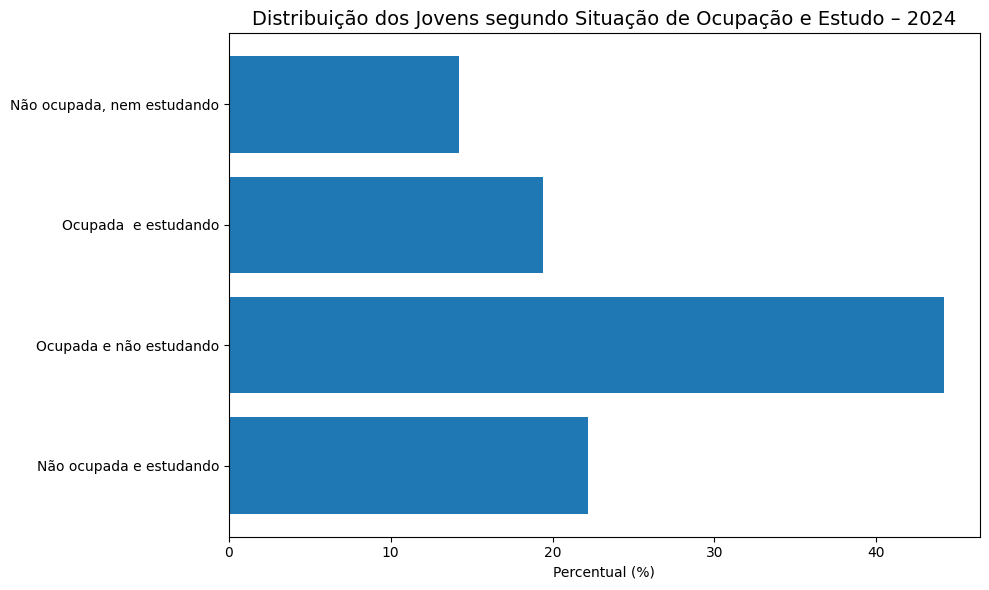

In [67]:
plt.figure(figsize=(10,6))

plt.barh(
    df_jovens_ocupacao_estudo['Situação'],
    df_jovens_ocupacao_estudo['2024']
)

plt.xlabel('Percentual (%)')
plt.title(
    'Distribuição dos Jovens segundo Situação de Ocupação e Estudo – 2024',
    fontsize=14
)

plt.tight_layout()
plt.show()


Diagnóstico da Ocupação Juvenil (2024)
A tabela acima revela um dado crítico para o marketing e a economia: 14,2% dos jovens encontram-se na condição de "Não ocupados, nem estudando".

Lógica Analítica: > * Este grupo representa a maior zona de risco para a exclusão financeira, pois a falta de renda recorrente impede o acesso saudável a produtos de crédito.

A predominância de jovens "Ocupados e não estudando" (44,2%) sugere uma inserção precoce no mercado de trabalho, muitas vezes em vagas de baixa qualificação e remuneração, o que pode levar ao superendividamento por falta de educação financeira.

###Tabela de Situação analfabetismo Raça/cor (Jovens 15 ou mais)


In [68]:
df_raca = df_pnadc.loc[
    df_pnadc['Nível'].isin(['7.3.1.1.2.1', '7.3.1.1.2.2']),
    ['Indicador', '2024']
].copy()

df_raca.rename(columns={'Indicador': 'Raça/Cor'}, inplace=True)

In [69]:
print(df_raca.to_markdown(index=False))

| Raça/Cor       |   2024 |
|:---------------|-------:|
| Branca         |    1.5 |
| Preta ou parda |    3.3 |


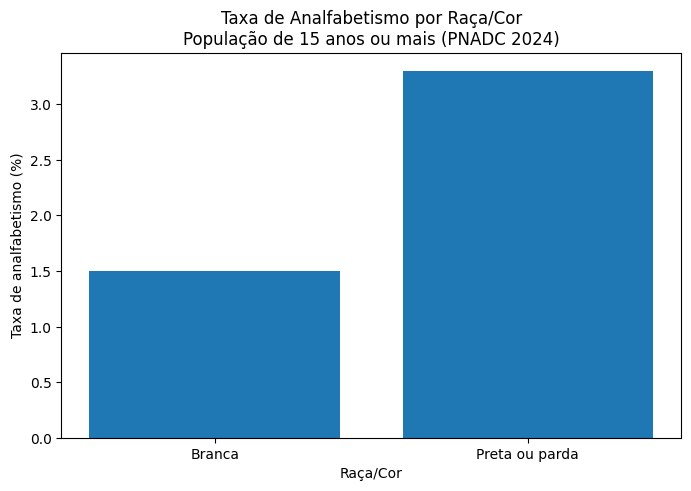

In [70]:
plt.figure(figsize=(8, 5))

plt.bar(
    df_raca['Raça/Cor'],
    df_raca['2024']
)

plt.title(
    'Taxa de Analfabetismo por Raça/Cor\nPopulação de 15 anos ou mais (PNADC 2024)'
)
plt.xlabel('Raça/Cor')
plt.ylabel('Taxa de analfabetismo (%)')

plt.show()


In [71]:
###A visualização a seguir apresenta a taxa de analfabetismo da população com 15 anos ou mais, segundo raça/cor, com base nos dados da PNAD Contínua.
##O gráfico permite evidenciar desigualdades estruturais no acesso à educação, que impactam diretamente as trajetórias sociais e econômicas dos indivíduos.


Embora os dados não permitam o cruzamento direto entre cor ou raça e situação de ocupação em nível individual, a análise conjunta dos indicadores evidencia que a população jovem apresenta elevada concentração em situações de menor inserção educacional e ocupacional, contexto no qual jovens pretos e pardos se encontram sobrerrepresentados, conforme a estrutura racial observada.

Tabela de taxa de escolarização

In [72]:
df_escolarizacao_idade = df_pnadc.loc[
    df_pnadc['Nível'].isin([
        '7.2.1.1',  # 0 a 3 anos
        '7.2.1.2',  # 4 a 5 anos
        '7.2.1.3',  # 6 a 14 anos
        '7.2.1.4',  # 15 a 17 anos
        '7.2.1.5'   # 18 a 24 anos
    ]),
    ['Indicador', '2024']
].copy()

df_escolarizacao_idade.rename(
    columns={'Indicador': 'Grupo de idade'},
    inplace=True
)




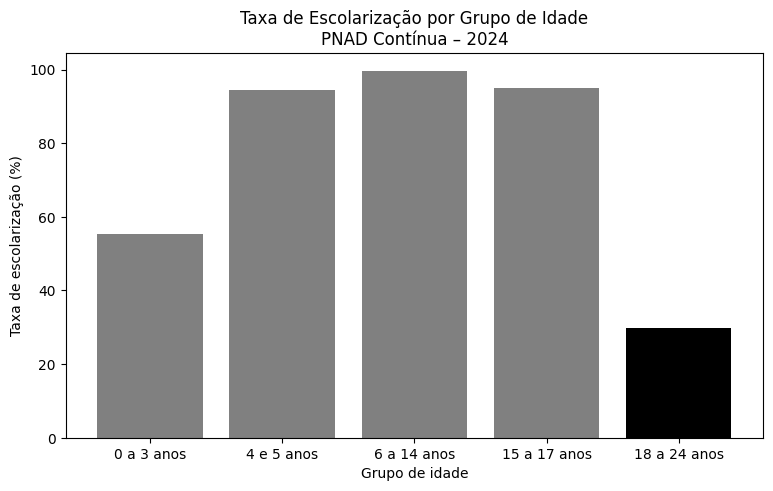

In [73]:
plt.figure(figsize=(9, 5))

# Criar lista de cores, destacando o grupo 18–24 anos
cores = [
    'gray' if idade != '18 a 24 anos' else 'black'
    for idade in df_escolarizacao_idade['Grupo de idade']
]

plt.bar(
    df_escolarizacao_idade['Grupo de idade'],
    df_escolarizacao_idade['2024'],
    color=cores
)

plt.title('Taxa de Escolarização por Grupo de Idade\nPNAD Contínua – 2024')
plt.xlabel('Grupo de idade')
plt.ylabel('Taxa de escolarização (%)')

plt.show()



Nesta etapa, é analisada a taxa de escolarização segundo grupos de idade, com base nos dados da PNAD Contínua.
O objetivo é evidenciar a dinâmica de permanência e evasão escolar ao longo do ciclo de vida, com especial atenção ao grupo de 18 a 24 anos, período marcado por forte redução da escolarização.


In [74]:
### Síntese do Cruzamento 1

#Nesta etapa, foram construídos indicadores descritivos a partir da base da PNAD Contínua, com foco na população jovem de 15 a 29 anos, com o objetivo de analisar dimensões da exclusão estrutural associadas à educação e à inserção no mercado de trabalho.
#Foram examinadas as condições de ocupação e estudo, a distribuição por raça/cor e os níveis de analfabetismo, bem como a taxa de escolarização segundo grupos de idade.

#Os resultados evidenciam desigualdades persistentes, tanto raciais quanto etárias, destacando uma queda acentuada da escolarização no grupo de 18 a 24 anos, período crítico de transição para a vida adulta.
#Esse padrão sugere a ocorrência de evasão educacional associada à inserção precoce no trabalho e a restrições socioeconômicas, contribuindo para trajetórias educacionais incompletas e maior vulnerabilidade ao longo do ciclo de vida.

#Dessa forma, o cruzamento realizado fornece uma base analítica consistente para os cruzamentos subsequentes com indicadores de vulnerabilidade financeira, permitindo aprofundar a compreensão das barreiras estruturais enfrentadas pela juventude analisada.


### Cruzamento 2: Escolaridade (PNADC) e Implicações para o Marketing

In [75]:
# Filtrar dados de escolaridade (Taxa de Escolarização 18-24 anos)

In [76]:
df_escolarizacao = df_pnadc[df_pnadc['Nível'].isin(['7.2.1.5'])].copy()

In [77]:
taxa_escolarizacao_18_24 = df_escolarizacao['2024'].iloc[0]
print(taxa_escolarizacao_18_24)

29.7


A análise da PNAD Contínua indica que apenas 29,7% dos jovens entre 18 e 24 anos encontram-se escolarizados, evidenciando uma ruptura educacional significativa no início da vida adulta.
Esse dado sugere que uma parcela expressiva desse público pode apresentar diferentes níveis de letramento formal, o que impacta diretamente a forma como informações complexas são compreendidas e processadas.

Do ponto de vista do marketing de produtos e serviços financeiros, esse cenário indica a necessidade de estratégias de comunicação mais acessíveis, com linguagem clara, objetiva e livre de jargões técnicos.
Além disso, torna-se relevante priorizar formatos e canais de fácil consumo, como vídeos curtos, conteúdos visuais e plataformas digitais amplamente utilizadas por esse público.

Assim, a escolaridade emerge como um fator estruturante para o desenho de estratégias de comunicação e educação financeira, reforçando a importância de abordagens que considerem o contexto educacional dos jovens analisados.

## Análise de Inadimplência e Endividamento

### Análise de Inadimplência (Serasa e Relatório Financeiro)

In [78]:
# Dados da Serasa (extraídos da análise secundária)

In [79]:
data_inadimplencia = {
    'Faixa_Etaria': ['18 a 25 anos', '26 a 40 anos', '41 a 60 anos', 'Acima de 60 anos'],
    'Percentual_Inadimplentes': [11.0, 33.4, 35.6, 20.0]
}

In [80]:
df_inadimplencia = pd.DataFrame(data_inadimplencia)
print(df_inadimplencia)

       Faixa_Etaria  Percentual_Inadimplentes
0      18 a 25 anos                      11.0
1      26 a 40 anos                      33.4
2      41 a 60 anos                      35.6
3  Acima de 60 anos                      20.0


#### Visualização da Inadimplência por Faixa Etária

In [81]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: title={'center': 'Distribuição de Inadimplentes por Faixa Etária (Serasa)'}, xlabel='Faixa_Etaria', ylabel='Percentual_Inadimplentes'>

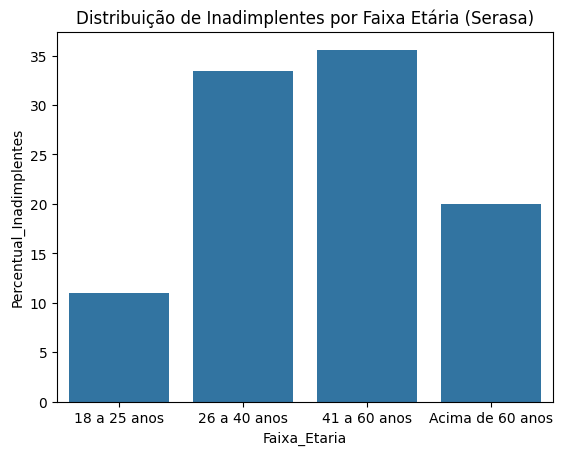

In [82]:
plt.title('Distribuição de Inadimplentes por Faixa Etária (Serasa)')
sns.barplot(x='Faixa_Etaria', y='Percentual_Inadimplentes', data=df_inadimplencia)

In [83]:
plt.show()

A menor fatia de inadimplência entre jovens (11.0% em Dez/2025) pode ser um ponto de partida para campanhas de marketing focadas em **prevenção** e **educação financeira** no início da vida adulta, transformando a vulnerabilidade em oportunidade de fidelização.

Comportamento da Inadimplência por Ciclo de Vida
A análise final cruza a idade com as taxas de inadimplência. Observamos uma progressão alarmante:

19 – 25 anos: 11,9% de inadimplência.

25 – 40 anos: Salto para 33,4%.

Conclusão Lógica: > O aumento da inadimplência conforme o jovem avança na idade adulta sugere que, ao assumirem mais responsabilidades financeiras (aluguel, contas domésticas, filhos), os jovens periféricos não possuem reserva de emergência ou suporte bancário adequado para lidar com imprevistos. Isso valida a hipótese de que a inclusão financeira atual é quantitativa (possuir conta), mas não qualitativa (saúde financeira).

Visualização da Inadimplência por Segmento

In [84]:
df_inad_segmento = pd.DataFrame({
    'segmento': [
        'Bancos / Cartão de Crédito',
        'Utilities',
        'Financeiras',
        'Serviços'
    ],
    'percentual_inadimplencia': [26.1, 22.1, 19.6, 11.9],
    'fonte': 'Serasa - Dez/2025'
})

df_inad_segmento


,segmento,percentual_inadimplencia,fonte
0,Bancos / Cartão de Crédito,26.1,Serasa - Dez/2025
1,Utilities,22.1,Serasa - Dez/2025
2,Financeiras,19.6,Serasa - Dez/2025
3,Serviços,11.9,Serasa - Dez/2025


Text(0, 0.5, 'Percentual de Inadimplência (%)')

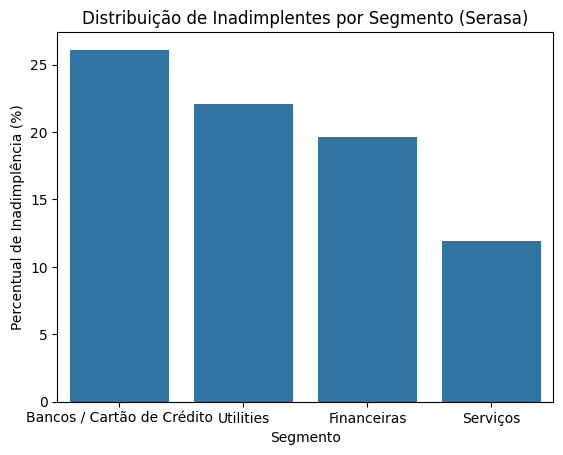

In [85]:
plt.title('Distribuição de Inadimplentes por Segmento (Serasa)')
sns.barplot(x='segmento', y='percentual_inadimplencia', data=df_inad_segmento)
plt.xlabel('Segmento')
plt.ylabel('Percentual de Inadimplência (%)')

Os achados obtidos a partir da análise da PNAD Contínua e dos indicadores de inadimplência do Serasa dialogam diretamente com os resultados apresentados no relatório Mapa de Iniciativas de Educação Financeira 2024, publicado pela ANBIMA. Embora o documento aponte um crescimento expressivo das ações de educação financeira no país — sobretudo em formatos digitais e híbridos —, destaca-se a predominância de abordagens genéricas, com baixa segmentação por renda, raça, geração ou nível educacional, o que limita a eficácia das iniciativas em contextos marcados por desigualdades estruturais.

Os resultados deste estudo reforçam essa constatação ao evidenciar baixos níveis de escolarização entre jovens e uma elevada incidência de inadimplência, sugerindo que conteúdos financeiros complexos, quando apresentados sem adaptação pedagógica, tendem a não ser plenamente compreendidos por esse público. Nesse sentido, a incorporação de indicadores de inadimplência por segmento econômico, com base em dados do Serasa (dezembro de 2025), permite observar a concentração do endividamento em setores diretamente associados ao consumo cotidiano e ao acesso ao crédito, como bancos, cartões de crédito e utilities.

Quando analisados de forma integrada, os dados empíricos e as evidências institucionais indicam que a vulnerabilidade financeira não se manifesta apenas no nível individual, mas também na relação estrutural entre jovens e os principais agentes do sistema financeiro. Assim, os resultados sustentam a importância de iniciativas de educação financeira que combinem alcance digital, planejamento pedagógico, acompanhamento contínuo e segmentação dos públicos, especialmente no caso de jovens em situação de vulnerabilidade social e educacional — grupo que, conforme destacado pela ANBIMA, tende a responder melhor a estratégias interativas, como vídeos curtos, gamificação e uso de redes sociais.

## Cruzamento dos dados do formulário de coleta

Nesta etapa, a análise é aprofundada a partir dos dados primários coletados por meio de formulário estruturado, permitindo observar como os padrões identificados nas bases secundárias se manifestam na experiência concreta dos respondentes.

O cruzamento das respostas possibilita analisar:

o nível de escolaridade dos participantes,

sua relação com produtos e serviços financeiros,

padrões de endividamento e organização financeira,

e a percepção sobre conteúdos de educação financeira.

Essa abordagem permite verificar se as tendências observadas na PNAD Contínua e nos indicadores de inadimplência se confirmam no nível individual, reforçando — ou tensionando — as hipóteses levantadas nas análises anteriores.

In [86]:
##Padronização dos Nomes das Variáveis

In [140]:
df_formulario = df_formulario.rename(columns={

    # Identificação básica
    'Carimbo de data/hora': 'timestamp',
    'Qual sua idade?': 'idade',  # se existir outra versão, ajustamos depois
    'Qual seu gênero?': 'genero',
    'Qual sua raça/cor? (autodeclaração)': 'raca',

    # Escolaridade e trabalho
    'Qual seu nível de escolaridade atual?': 'escolaridade',
    'Qual sua situação de trabalho atual?': 'situacao_trabalho',

    # Condição social
    'Você mora atualmente em um bairro considerado periférico/de baixa renda?': 'periferia',

    # Acesso financeiro
    'Você possui conta em banco/fintech?': 'conta_bancaria',
    'Qual o principal meio de acesso à sua conta ou serviços financeiros ?': 'meio_acesso',

    # Comportamento financeiro
    'Atualmente está com pagamentos atrasados?': 'inadimplencia',
    'Você consegue guardar algum dinheiro todo mês?': 'reserva_mensal',
    'Você tem algum fundo de emergência (reserva para imprevistos)?': 'fundo_emergencia',

    # Educação financeira
    'Já participou de curso, palestra ou orientação sobre finanças?': 'educacao_financeira',
    'Quando o assunto é dinheiro ou educação financeira, em quem você mais confia?': 'confianca_financeira',

    # Percepção e aprendizado
    'Quais formatos seriam mais úteis pra você aprender sobre finanças? (marque até 2 opções)': 'formato_aprendizado',
    'O que faria você se sentir mais confiante financeiramente? (marque até 2 opções)': 'confianca_desejada',

    # Renda
    '  Qual a sua renda familiar mensal bruta aproximada (a soma de todos que moram com você e contribuem para a casa)?  ': 'renda_familiar',

})

In [88]:
df_formulario.dropna(how='all', inplace=True)

In [89]:
df_formulario.columns
df_formulario.head()

,timestamp,idade,genero,raca,escolaridade,situacao_trabalho,periferia,conta_bancaria,meio_acesso,Com que frequência você usa cada um dos serviços abaixo? [Pix],Com que frequência você usa cada um dos serviços abaixo? [Débito],Com que frequência você usa cada um dos serviços abaixo? [Crédito (parcelamento/cartão)],Com que frequência você usa cada um dos serviços abaixo? [Empréstimo/financiamento],Com que frequência você usa cada um dos serviços abaixo? [Poupança],"Com que frequência você usa cada um dos serviços abaixo? [Investimentos (tesouro direto, CDB, etc.)]","Se não tem conta, como faz transações normalmente? (marcar todas que se aplicam)",O que você acha que falta nos aplicativos financeiros para atender melhor você e outros com sua realidade?,Qual desses você mais usa? (Escolha 1),Qual o motivo principal para usar crédito? (marque até 2 opções),inadimplencia,"Se você tem dívida atrasada, qual o impacto principal em sua vida? (marque até 2 opções)",O que te faria confiar mais em uma empresa que oferece crédito ou serviços financeiros?,reserva_mensal,"Em caso de uma despesa inesperada de R$500, você:",fundo_emergencia,educacao_financeira,confianca_financeira,formato_aprendizado,confianca_desejada,"Pra você, o que uma marca precisa fazer pra se conectar de verdade com os jovens da periferia?",Qual a sua renda familiar mensal bruta aproximada (a soma de todos que moram com você e contribuem para a casa)?,"Se a sua vida financeira fosse totalmente estável e você tivesse um dinheiro extra sobrando todo mês, qual dos seus principais objetivos você priorizaria? (Escolha até 2 opções)"
0,2025-10-31 09:56:01.019,19 – 24 anos,Masculino,Parda,Ensino superior incompleto,Só estuda,Sim,Sim – ambos,Celular (App),Uso sempre,Uso frequentemente,Uso sempre,Uso frequentemente,Nunca uso,Uso às vezes,NaN,Acredito que alguns aplicativos tem atendiment...,Cartão de crédito,"Necessidades básicas (alimentação, remédio), E...",Sim,"Corto gastos básicos ou de lazer, Fico com est...",Formas de negocuar as dívidas,Não consigo,Não conseguiria (pediria empréstimo ou ajuda),Não,Não,"Bancos tradicionais/ digitais, Influenciadores...","Vídeos curtos em redes sociais (WhatsApp, Yout...","Aulas/treinamentos financeiros, Acesso a crédi...",Entender a realidade deles e criar programas p...,NaN,NaN
1,2025-10-31 10:08:48.935,19 – 24 anos,Masculino,Parda,Ensino superior completo,Trabalho formal (carteira assinada),Sim,Sim – banco tradicional,Celular (App),Uso sempre,Uso sempre,Uso raramente,Nunca uso,Nunca uso,Uso sempre,NaN,Nada,Cartão de crédito,"Lazer/sonhos (viagem, festa)",Não,NaN,NaN,"Sim, regularmente",Pagaria sem dificuldade com reservas próprias,SIm,Não,Eu mesmo(a) — prefiro aprender por conta própria,Atividades práticas de organização financeira,"Aulas/treinamentos financeiros, Emprego estáve...",.,NaN,NaN
2,2025-10-31 10:41:32.381,19 – 24 anos,Feminino,Amarela,Ensino superior incompleto,Trabalho formal (carteira assinada),Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-10-31 10:45:09.009,25 – 29 anos,Masculino,Parda,Ensino superior completo,Trabalho formal (carteira assinada),Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-10-31 21:08:01.380,25 – 29 anos,Masculino,Amarela,Ensino superior incompleto,Não trabalha nem estuda,Sim,Sim – banco digital/fintech,Celular (App),Uso sempre,Uso frequentemente,Uso sempre,Uso frequentemente,Uso frequentemente,Uso frequentemente,NaN,Sim,Cartão de crédito,"Compra de bens (celular, eletrônicos), Emergên...",Sim,"Corto gastos básicos ou de lazer, Busco renda ...",Personalização de uso,Às vezes,Pagaria com dificuldade (apertando o orçamento),SIm,Sim,"Bancos tradicionais/ digitais, Professores ou ...","Aulas presenciais na comunidade, Atividades pr...","Aulas/treinamentos financeiros, Apoio para for...",.,"Mais de 2 a 3 salários mínimos (R$ 2.824,01 a ...",Abrir meu próprio negócio (ou investir no 

 Criação de Variáveis Analíticas

Variável Jovem Periférico

In [90]:
df_formulario['jovem_periferico'] = np.where(df_formulario['periferia'] == 'Sim', 1, 0)

Transformação Sim/Não em Binário

In [141]:
colunas_binarias = ['inadimplencia', 'reserva_mensal', 'educacao_financeira']


for col in colunas_binarias:
    df_formulario[col] = df_formulario[col].map({'Sim': 1, 'Não': 0})

# Special handling for 'conta_bancaria' as its original values are not simple 'Sim'/'Não'
df_formulario['conta_bancaria'] = df_formulario['conta_bancaria'].apply(lambda x: 1 if pd.notna(x) else 0)

In [117]:
df_formulario['jovem_periferico'].value_counts(normalize=True) * 100


,proportion
jovem_periferico,
1,59.615385
0,40.384615


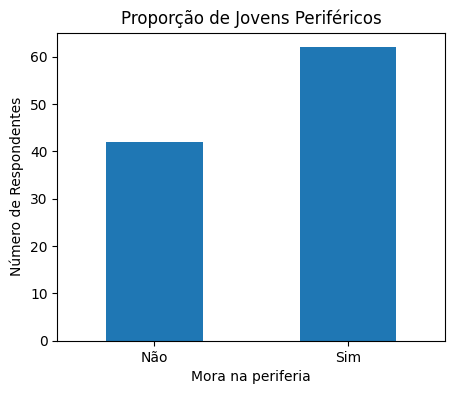

In [121]:
plt.figure(figsize=(5,4))

df_formulario['jovem_periferico'] \
    .value_counts() \
    .sort_index() \
    .plot(kind='bar')

plt.title('Proporção de Jovens Periféricos')
plt.xticks([0, 1], ['Não', 'Sim'], rotation=0)
plt.ylabel('Número de Respondentes')
plt.xlabel('Mora na periferia')
plt.show()


#A distribuição da amostra

A distribuição etária indica que a amostra é composta majoritariamente por jovens, negros
o que está alinhado com o recorte proposto pela pesquisa.

#Idade

In [97]:
df_formulario['idade'].describe()





,idade
count,104
unique,4
top,19 – 24 anos
freq,74


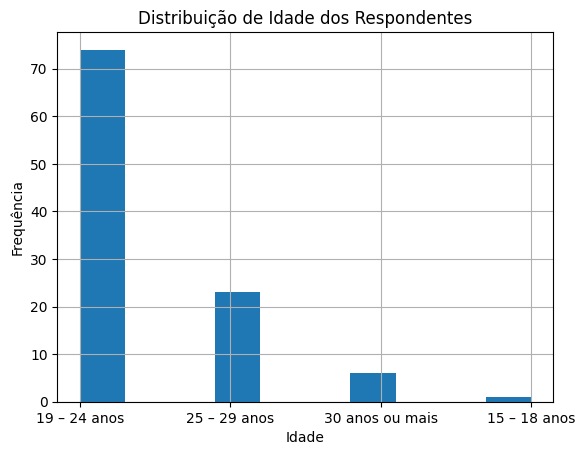

In [95]:
plt.figure()
df_formulario['idade'].hist(bins=10)
plt.title('Distribuição de Idade dos Respondentes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


#Gênero

In [98]:
df_formulario['genero'].value_counts(normalize=True) * 100


,proportion
genero,
Masculino,55.769231
Feminino,44.230769


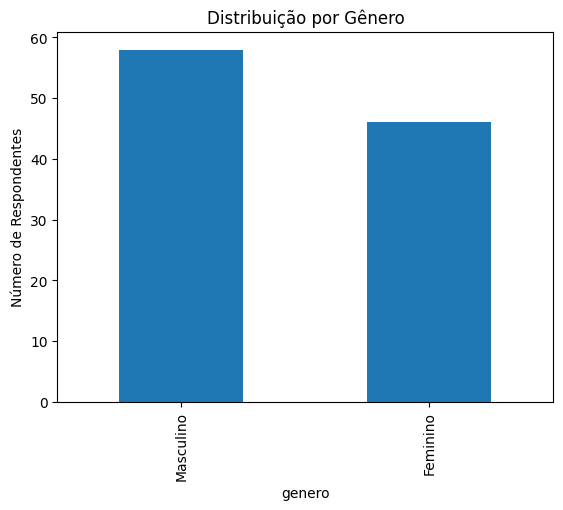

In [99]:
plt.figure()
df_formulario['genero'].value_counts().plot(kind='bar')
plt.title('Distribuição por Gênero')
plt.ylabel('Número de Respondentes')
plt.show()


#Raça/Cor

In [101]:
df_formulario['raca'].value_counts(normalize=True) * 100

,proportion
raca,
Branca,35.576923
Preta,30.769231
Parda,27.884615
Amarela,4.807692
Indígena,0.961538


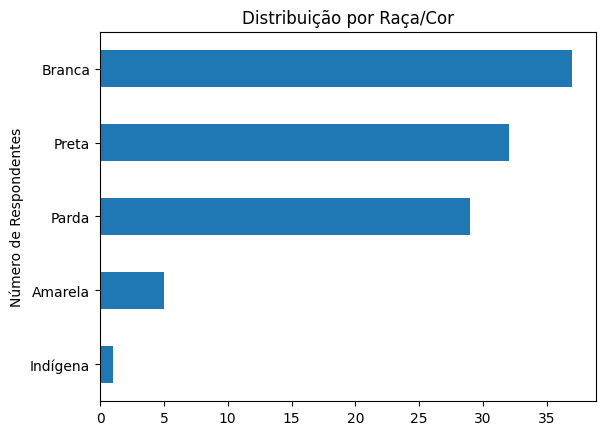

In [116]:
plt.figure()
df_formulario['raca'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Distribuição por Raça/Cor')
plt.ylabel('Número de Respondentes')
plt.show()


#Escolaridade

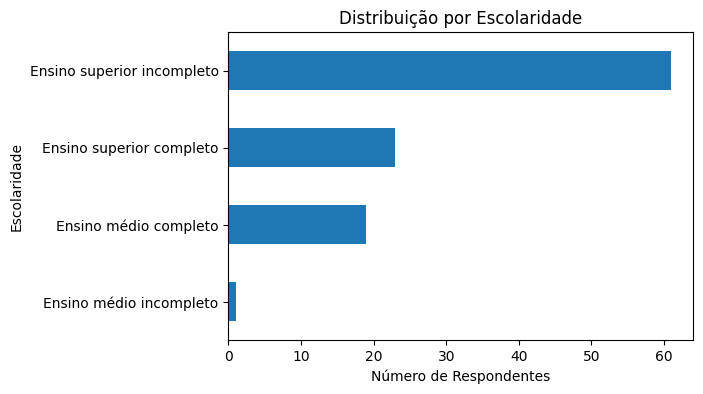

In [112]:
plt.figure(figsize=(6,4))

df_formulario['escolaridade'] \
    .value_counts() \
    .sort_values(ascending=True) \
    .plot(kind='barh')

plt.title('Distribuição por Escolaridade')
plt.xlabel('Número de Respondentes')
plt.ylabel('Escolaridade')
plt.show()

Situação de Trabalho

Renda Familiar

#Condição Territorial e Renda

Esta seção analisa a condição territorial dos respondentes e a renda familiar,
variáveis centrais para a compreensão das desigualdades socioeconômicas.


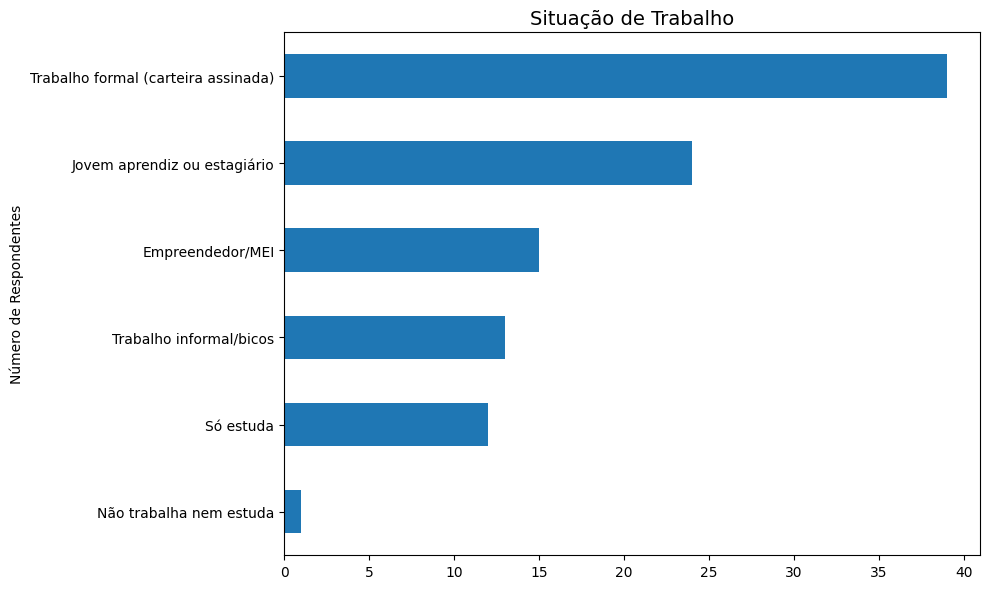

In [114]:
plt.figure(figsize=(10,6))
df_formulario['situacao_trabalho'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Situação de Trabalho', fontsize=14)
plt.ylabel('Número de Respondentes')
plt.tight_layout()
plt.show()

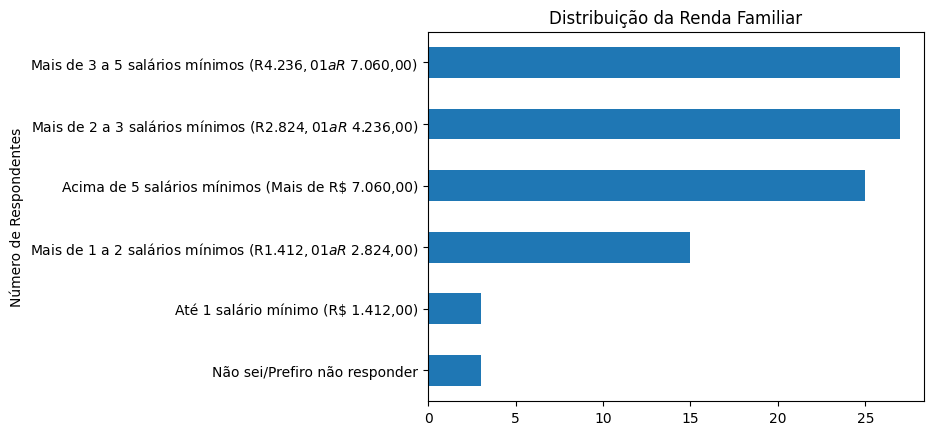

In [131]:
plt.figure()
df_formulario['renda_familiar'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Distribuição da Renda Familiar')
plt.ylabel('Número de Respondentes')
plt.show()

#. Inclusão e Comportamento Financeiro

Nesta etapa, são analisados indicadores relacionados ao acesso ao sistema financeiro,
educação financeira e práticas de organização financeira pessoal.


In [156]:
df_formulario['conta_bancaria'] = df_formulario['conta_bancaria'].astype(int)


In [157]:
(df_formulario['conta_bancaria']
 .value_counts(normalize=True)
 .sort_index()
 .mul(100))


,proportion
conta_bancaria,
0,1.923077
1,98.076923


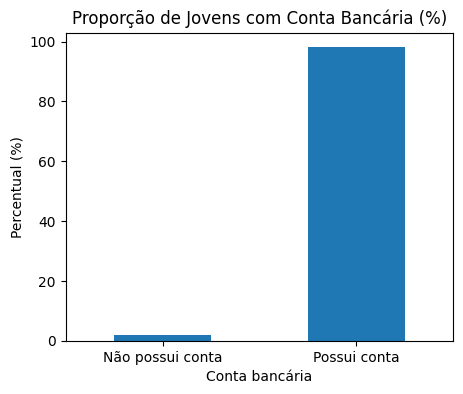

In [161]:
plt.figure(figsize=(5,4))

(df_formulario['conta_bancaria']
 .value_counts(normalize=True)
 .sort_index()
 .mul(100)
 .plot(kind='bar'))

plt.title('Proporção de Jovens com Conta Bancária (%)')
plt.xticks([0, 1], ['Não possui conta', 'Possui conta'], rotation=0)
plt.ylabel('Percentual (%)')
plt.xlabel('Conta bancária')
plt.show()




# Educação financeira

In [162]:
df_formulario['educacao_financeira'].value_counts(normalize=True) * 100


,proportion
educacao_financeira,
0.0,57.843137
1.0,42.156863


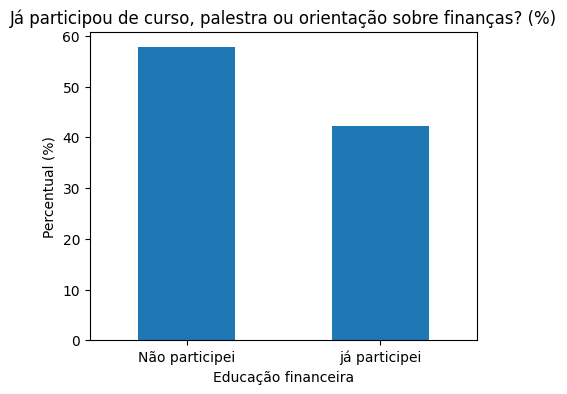

In [168]:
plt.figure(figsize=(5,4))

(df_formulario['educacao_financeira']
 .value_counts(normalize=True)
 .sort_index()
 .mul(100)
 .plot(kind='bar'))

plt.title('Já participou de curso, palestra ou orientação sobre finanças? (%)')
plt.ylabel('Percentual (%)')
plt.xlabel('Educação financeira')
plt.xticks([0, 1], ['Não participei', 'já participei'], rotation=0)
plt.show()


In [165]:
indicadores = ['inadimplencia', 'reserva_mensal', 'fundo_emergencia']

for col in indicadores:
    print(col)
    print(df_formulario[col].value_counts(normalize=True) * 100)
    print('---')


inadimplencia
inadimplencia
0.0    73.529412
1.0    26.470588
Name: proportion, dtype: float64
---
reserva_mensal
Series([], Name: proportion, dtype: float64)
---
fundo_emergencia
fundo_emergencia
SIm    56.862745
Não    43.137255
Name: proportion, dtype: float64
---


Os resultados indicam diferentes níveis de vulnerabilidade financeira,
com destaque para a dificuldade de formação de reserva e presença de inadimplência
em parte relevante da amostra.

#Confiança e Aprendizado Financeiro

In [170]:
df_formulario['confianca_financeira'].value_counts().head(10)

,count
confianca_financeira,
Eu mesmo(a) — prefiro aprender por conta própria,11
Professores ou especialistas,10
Amigos ou familiares,6
"Professores ou especialistas, Amigos ou familiares",5
"ONGs ou projetos sociais, Professores ou especialistas",4
"Eu mesmo(a) — prefiro aprender por conta própria, Professores ou especialistas",4
"Amigos ou familiares, Eu mesmo(a) — prefiro aprender por conta própria",3
"Professores ou especialistas, Eu mesmo(a) — prefiro aprender por conta própria",3
"Sites ou canais de notícias, Professores ou especialistas",2


In [171]:
df_formulario['formato_aprendizado'].value_counts().head(10)


,count
formato_aprendizado,
"Vídeos curtos em redes sociais (WhatsApp, Youtube, etc.), Atividades práticas de organização financeira",15
"Atividades práticas de organização financeira, Vídeos curtos em redes sociais (WhatsApp, Youtube, etc.)",12
"Vídeos curtos em redes sociais (WhatsApp, Youtube, etc.), Aplicativo de aprendizado sobre dinheiro",11
"Atividades práticas de organização financeira, Aulas presenciais",9
"Vídeos curtos em redes sociais (WhatsApp, Youtube, etc.)",8
"Aulas presenciais, Atividades práticas de organização financeira",7
"Aplicativo de aprendizado sobre dinheiro, Atividades práticas de organização financeira",7
"Atividades práticas de organização financeira, Aplicativo de aprendizado sobre dinheiro",4
"Aplicativo de aprendizado sobre dinheiro, Vídeos curtos em redes sociais (WhatsApp, Youtube, etc.)",4


As respostas relacionadas à confiança e aos formatos de aprendizado
evidenciam a importância de abordagens acessíveis, digitais e próximas da realidade
dos jovens para ações de educação financeira.
